# 0. Load packages & Load data

In [ ]:
# 기본 패키지 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
%matplotlib inline
import seaborn as sns

# 데이터 전처리
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

# 사이킷런 모델 패키지
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# train, test split
from sklearn.model_selection import train_test_split

# 모델검정 패키지
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

# 최적화 패키지
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve

# oversampling
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 데이터 불러오기
data = pd.read_csv('creditcard.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 시각화 위한 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
plt.rc('font', family='NanumBarunGothic')

# 1. EDA

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 1) Class 분포 확인

- 정상거래(284315건)에 비해 사기거래(492건)의 빈도가 매우 낮음

In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

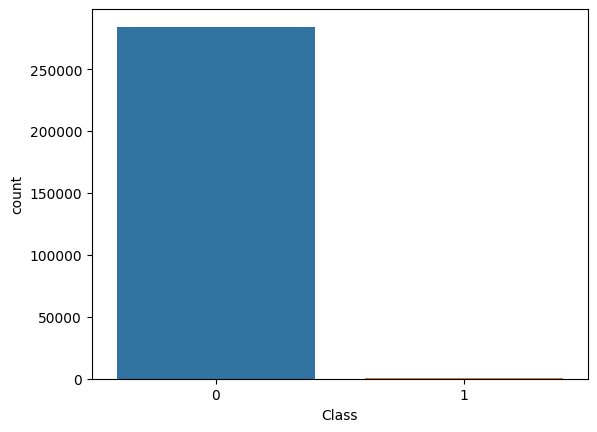

In [ ]:
sns.countplot(x='Class', data=data)

## 2) 결측치 확인


- 데이터 전체에 결측치가 존재하지 않음

In [ ]:
print(data.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


<Axes: >

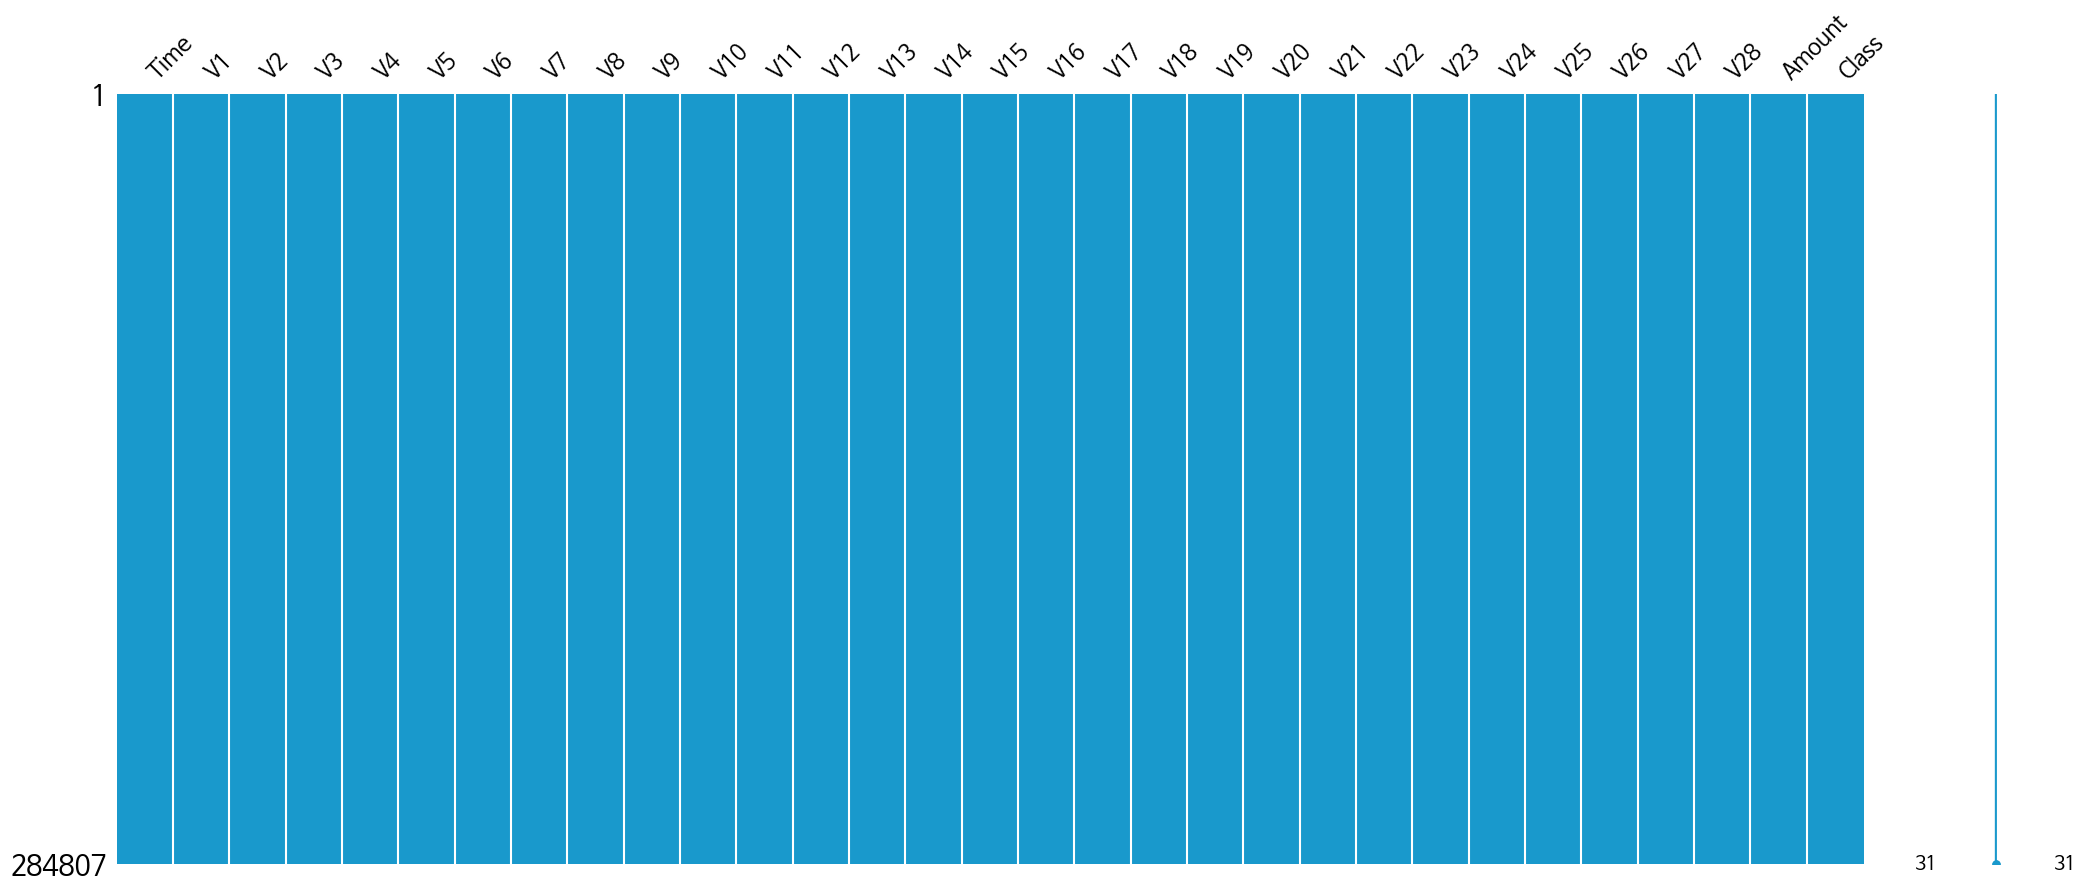

In [ ]:
import missingno as msno
msno.matrix(df = data.iloc[:, :], color=(0.1, 0.6, 0.8))

## 3) 변수 유형 확인 (continuous variable, binary variable)

- 반응변수(Class)를 제외한 모든 설명변수는 연속형 변수

In [ ]:
binary_cols = [col for col in data.columns if data[col].nunique() == 2]
continuous_cols = [col for col in data.columns if data[col].nunique() > 2]
print('# of binary variables:',len(binary_cols))
print('# of continuous variables:',len(continuous_cols))

# of binary variables: 1
# of continuous variables: 30


## 4) 다중공선성 확인

* 큰 상관관계를 보이는 변수가 없음. PCA의 특성 상 각 주요 구성 요소가 직교하기 때문이라 이해할 수 있음.

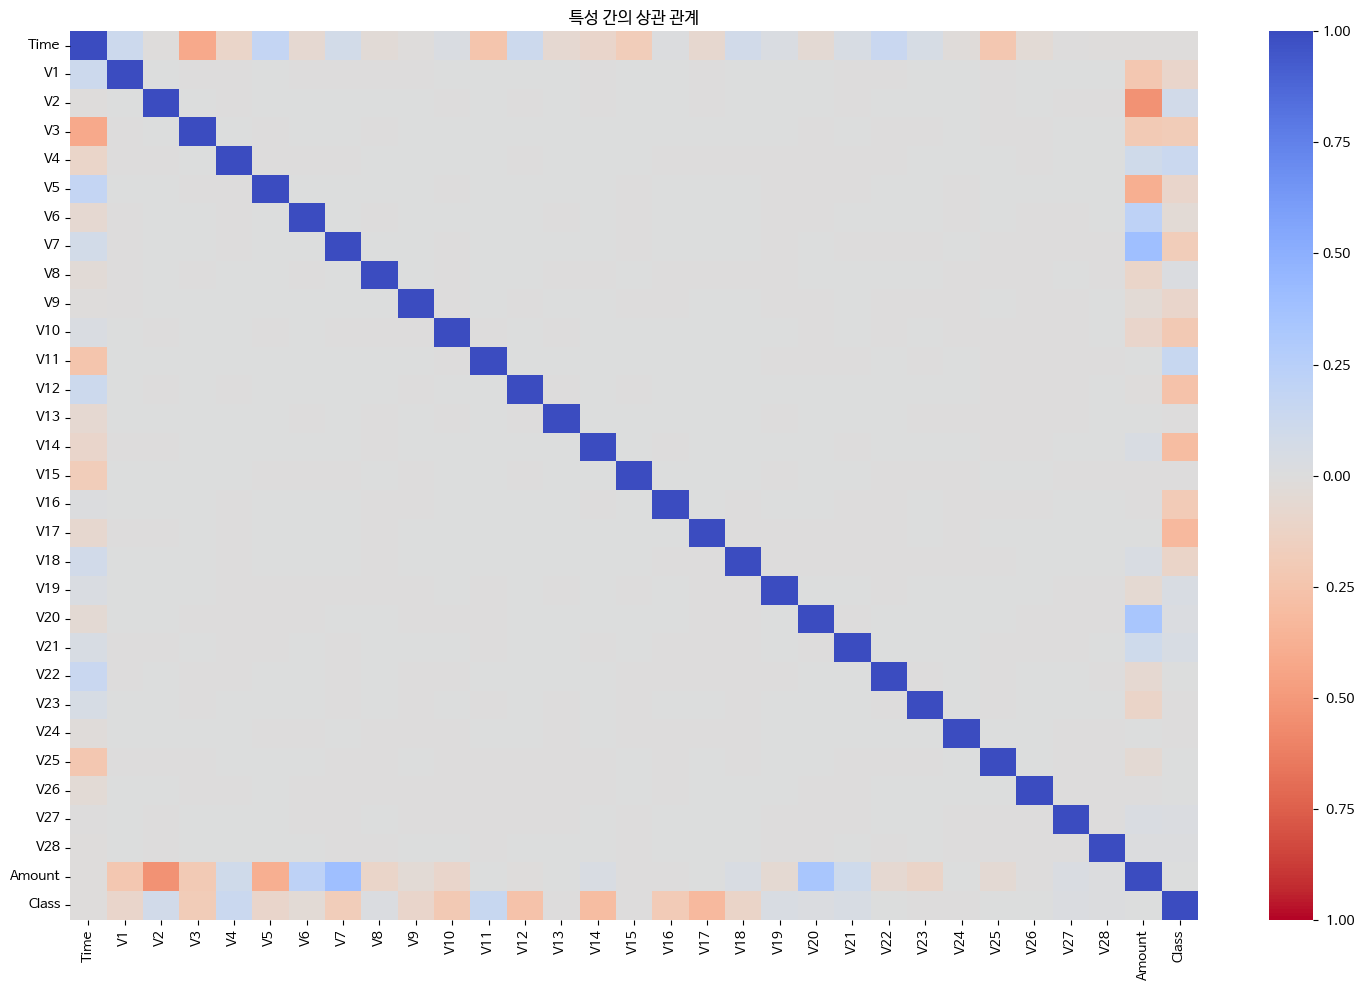

In [ ]:
# 상관 관계 분석
correlation_matrix = data.corr()

# 상관 관계 시각화
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm_r', vmin=-1, vmax=1, annot=False, fmt=".2f")
plt.title('특성 간의 상관 관계')
plt.tight_layout()
plt.show()

## 5) 각 변수 분포 확인

**[Amount 변수 시각화]** 그래프가 right-skewed된 형태로 나타남
- 대부분의 거래가 소액 거래라는 것을 알 수 있음.
- 전처리 시 log transformation을 진행하겠다는 전략 수립함.

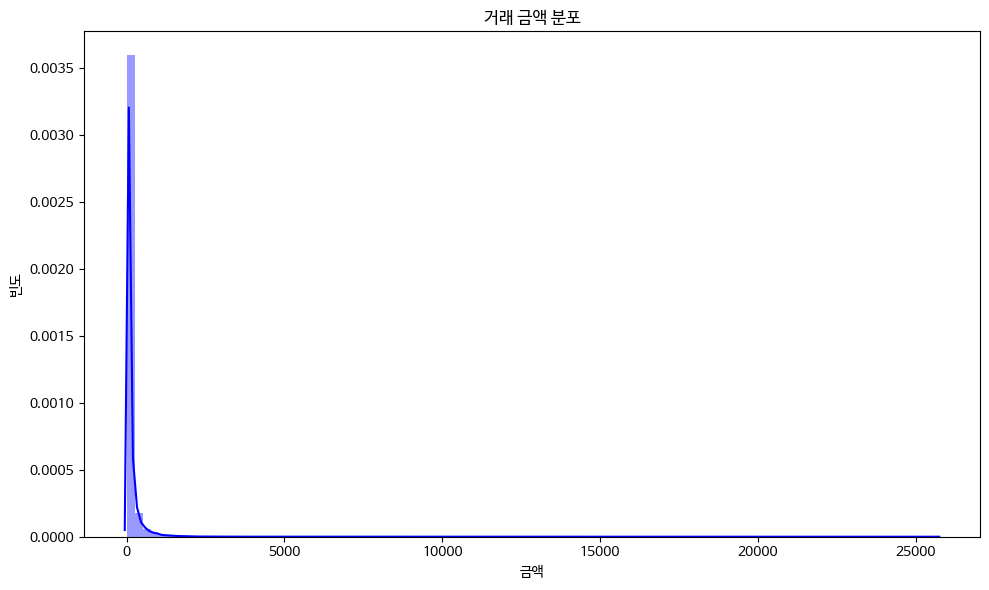

In [ ]:
# 'Amount'변수(거래금액) 분포 시각화
plt.figure(figsize=(10, 6))
sns.distplot(data['Amount'], bins=100, color='blue')
plt.title('거래 금액 분포')
plt.xlabel('금액')
plt.ylabel('빈도')
plt.tight_layout()
plt.show()

**[Time 변수 시각화]**
- 사기거래의 빈도가 두드러지게 높은 시간대 존재

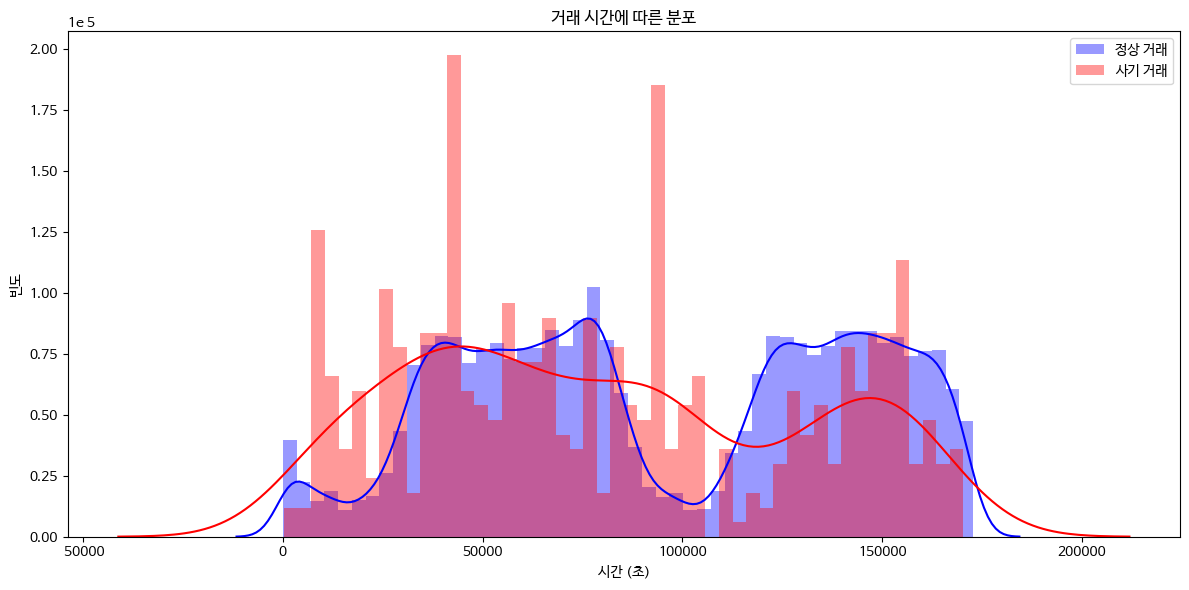

In [ ]:
# 'Time'변수(거래시간)에 따른 정상 거래와 사기 거래 분포 시각화
plt.figure(figsize=(12, 6))

sns.distplot(data[data['Class'] == 0]['Time'], bins=50, color='blue', label='정상 거래')
sns.distplot(data[data['Class'] == 1]['Time'], bins=50, color='red', label='사기 거래')

plt.title('거래 시간에 따른 분포')
plt.xlabel('시간 (초)')
plt.ylabel('빈도')
plt.legend()
plt.tight_layout()
plt.show()

**data['Hour'] 변수 추가**: 하루의 24시간을 기준으로 어떤 시간대에 거래가 발생했는지 파악할 수 있도록 함.
- 정상거래와 사기거래 모두 전체 시간대에서 꾸준히 발생함.

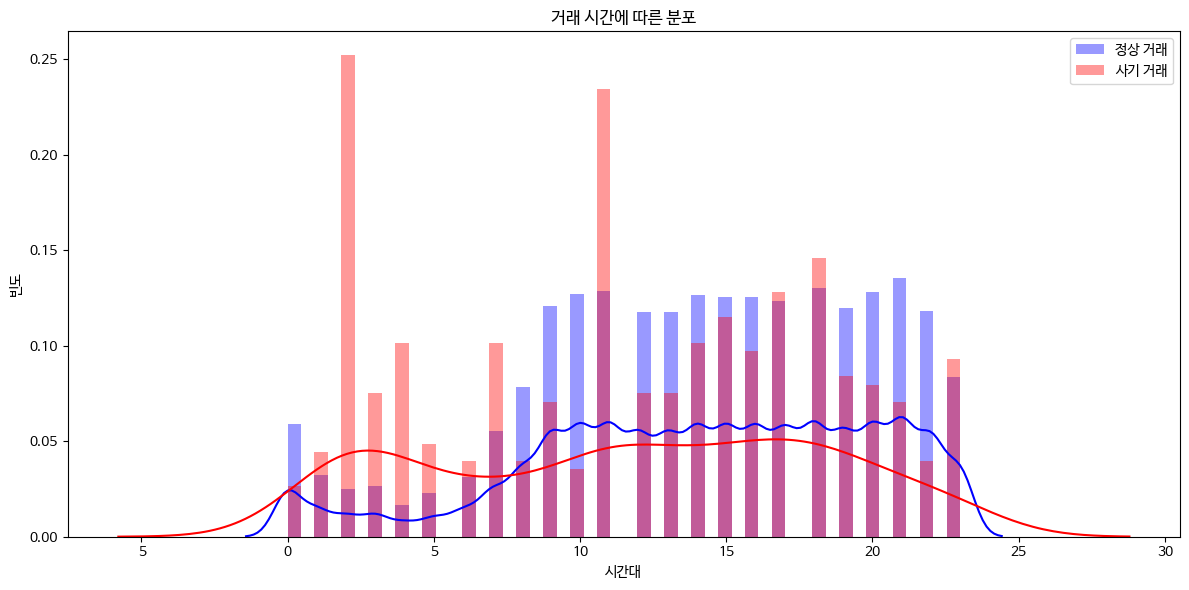

In [ ]:
# 'Time'변수를 이용하여 24시간을 기준으로 어떤 시간대에 거래가 발생했는지 도출
data['Hour'] = (data['Time'] % 86400) // 3600

# 시간대별 정상 거래와 사기 거래 분포 시각화
plt.figure(figsize=(12, 6))

sns.distplot(data[data['Class'] == 0]['Hour'], bins=50, color='blue', label='정상 거래')
sns.distplot(data[data['Class'] == 1]['Hour'], bins=50, color='red', label='사기 거래')

plt.title('거래 시간에 따른 분포')
plt.xlabel('시간대')
plt.ylabel('빈도')
plt.legend()  # 범례 표시
plt.tight_layout()
plt.show()

**[PCA 변수 분포 시각화]**
- V12, V14, V17 등 일부 변수의 경우 사기 거래의 분포가 정상 거래의 분포와 확연히 다름.

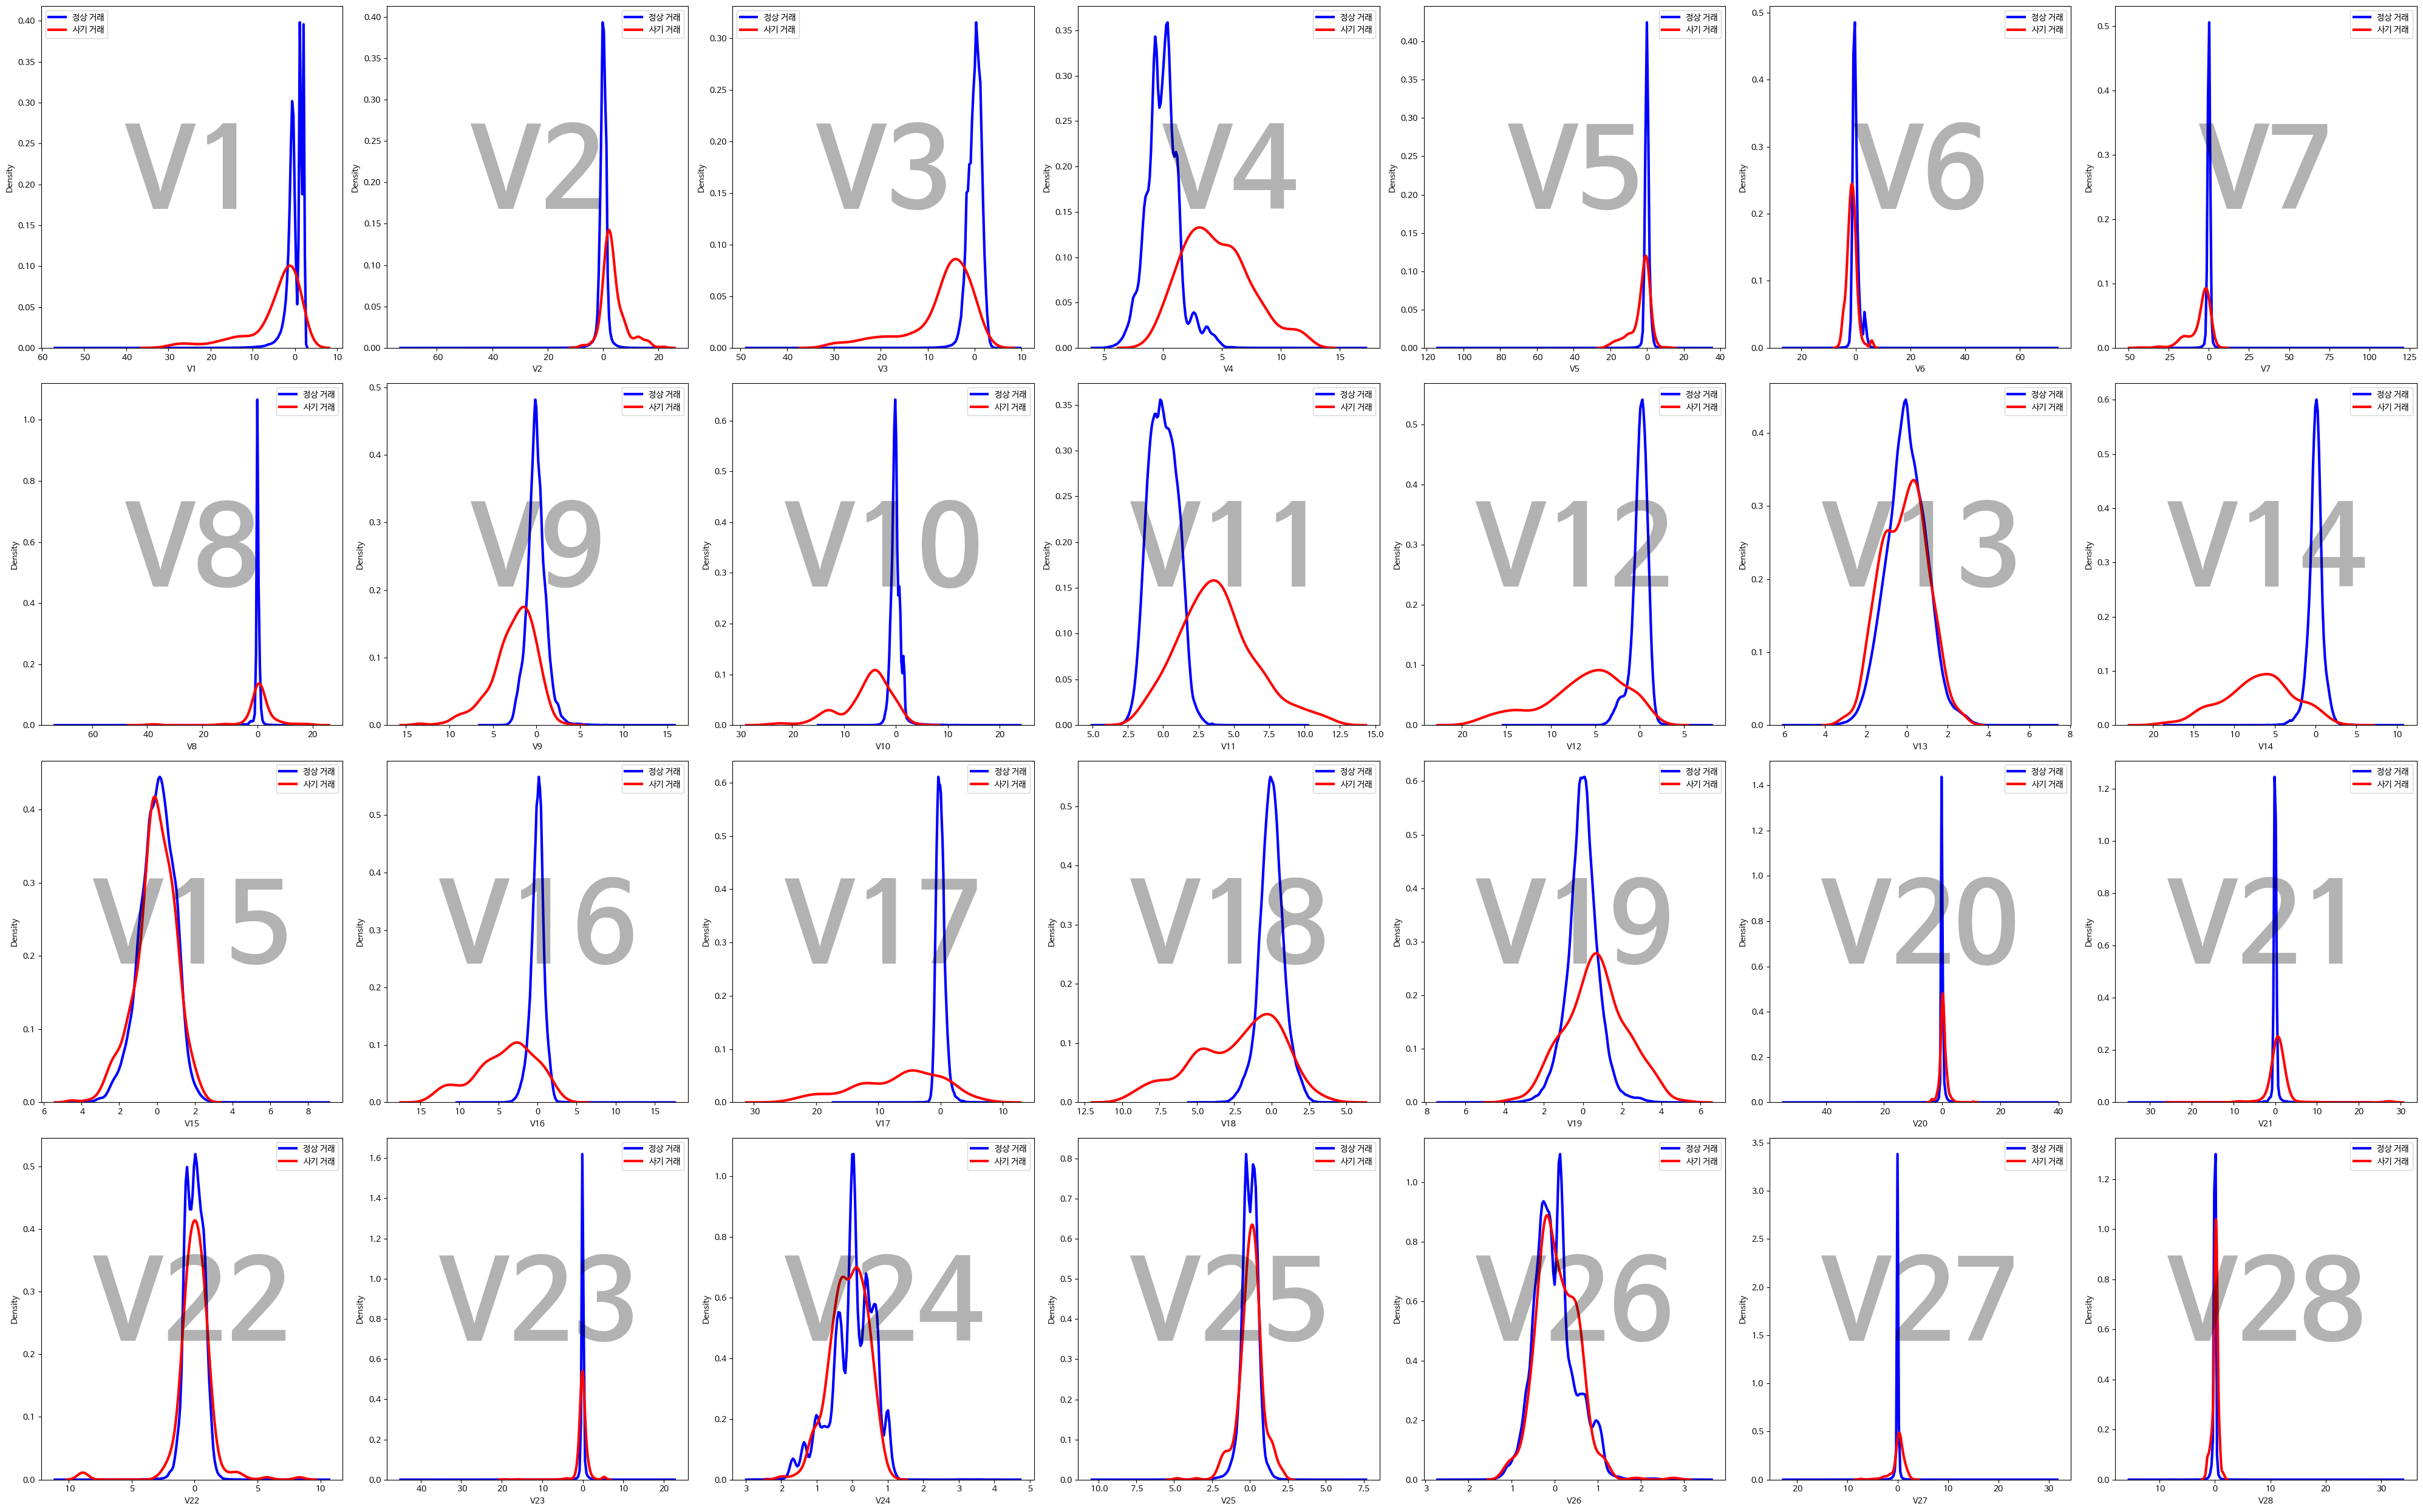

In [ ]:
plt.figure(figsize=(40, 25))
for i, col in enumerate(data.columns[1:29], 1):
    plt.subplot(4, 7, i)
    sns.kdeplot(data[data['Class'] == 0][col], color='blue', label='정상 거래',linewidth=3)
    sns.kdeplot(data[data['Class'] == 1][col], color='red', label='사기 거래',linewidth=3)
    plt.legend()

    plt.text(0.5, 0.5, col, horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes, fontsize=130, fontweight='bold', alpha=0.3)

    plt.tight_layout()

plt.show()

## 6) 이상치 확인

- 거의 모든 변수에 이상치가 존재함.
- 이상치에 덜 민감한 tree 계열의 모델이 성능이 좋을 것이라 예측 가능함.

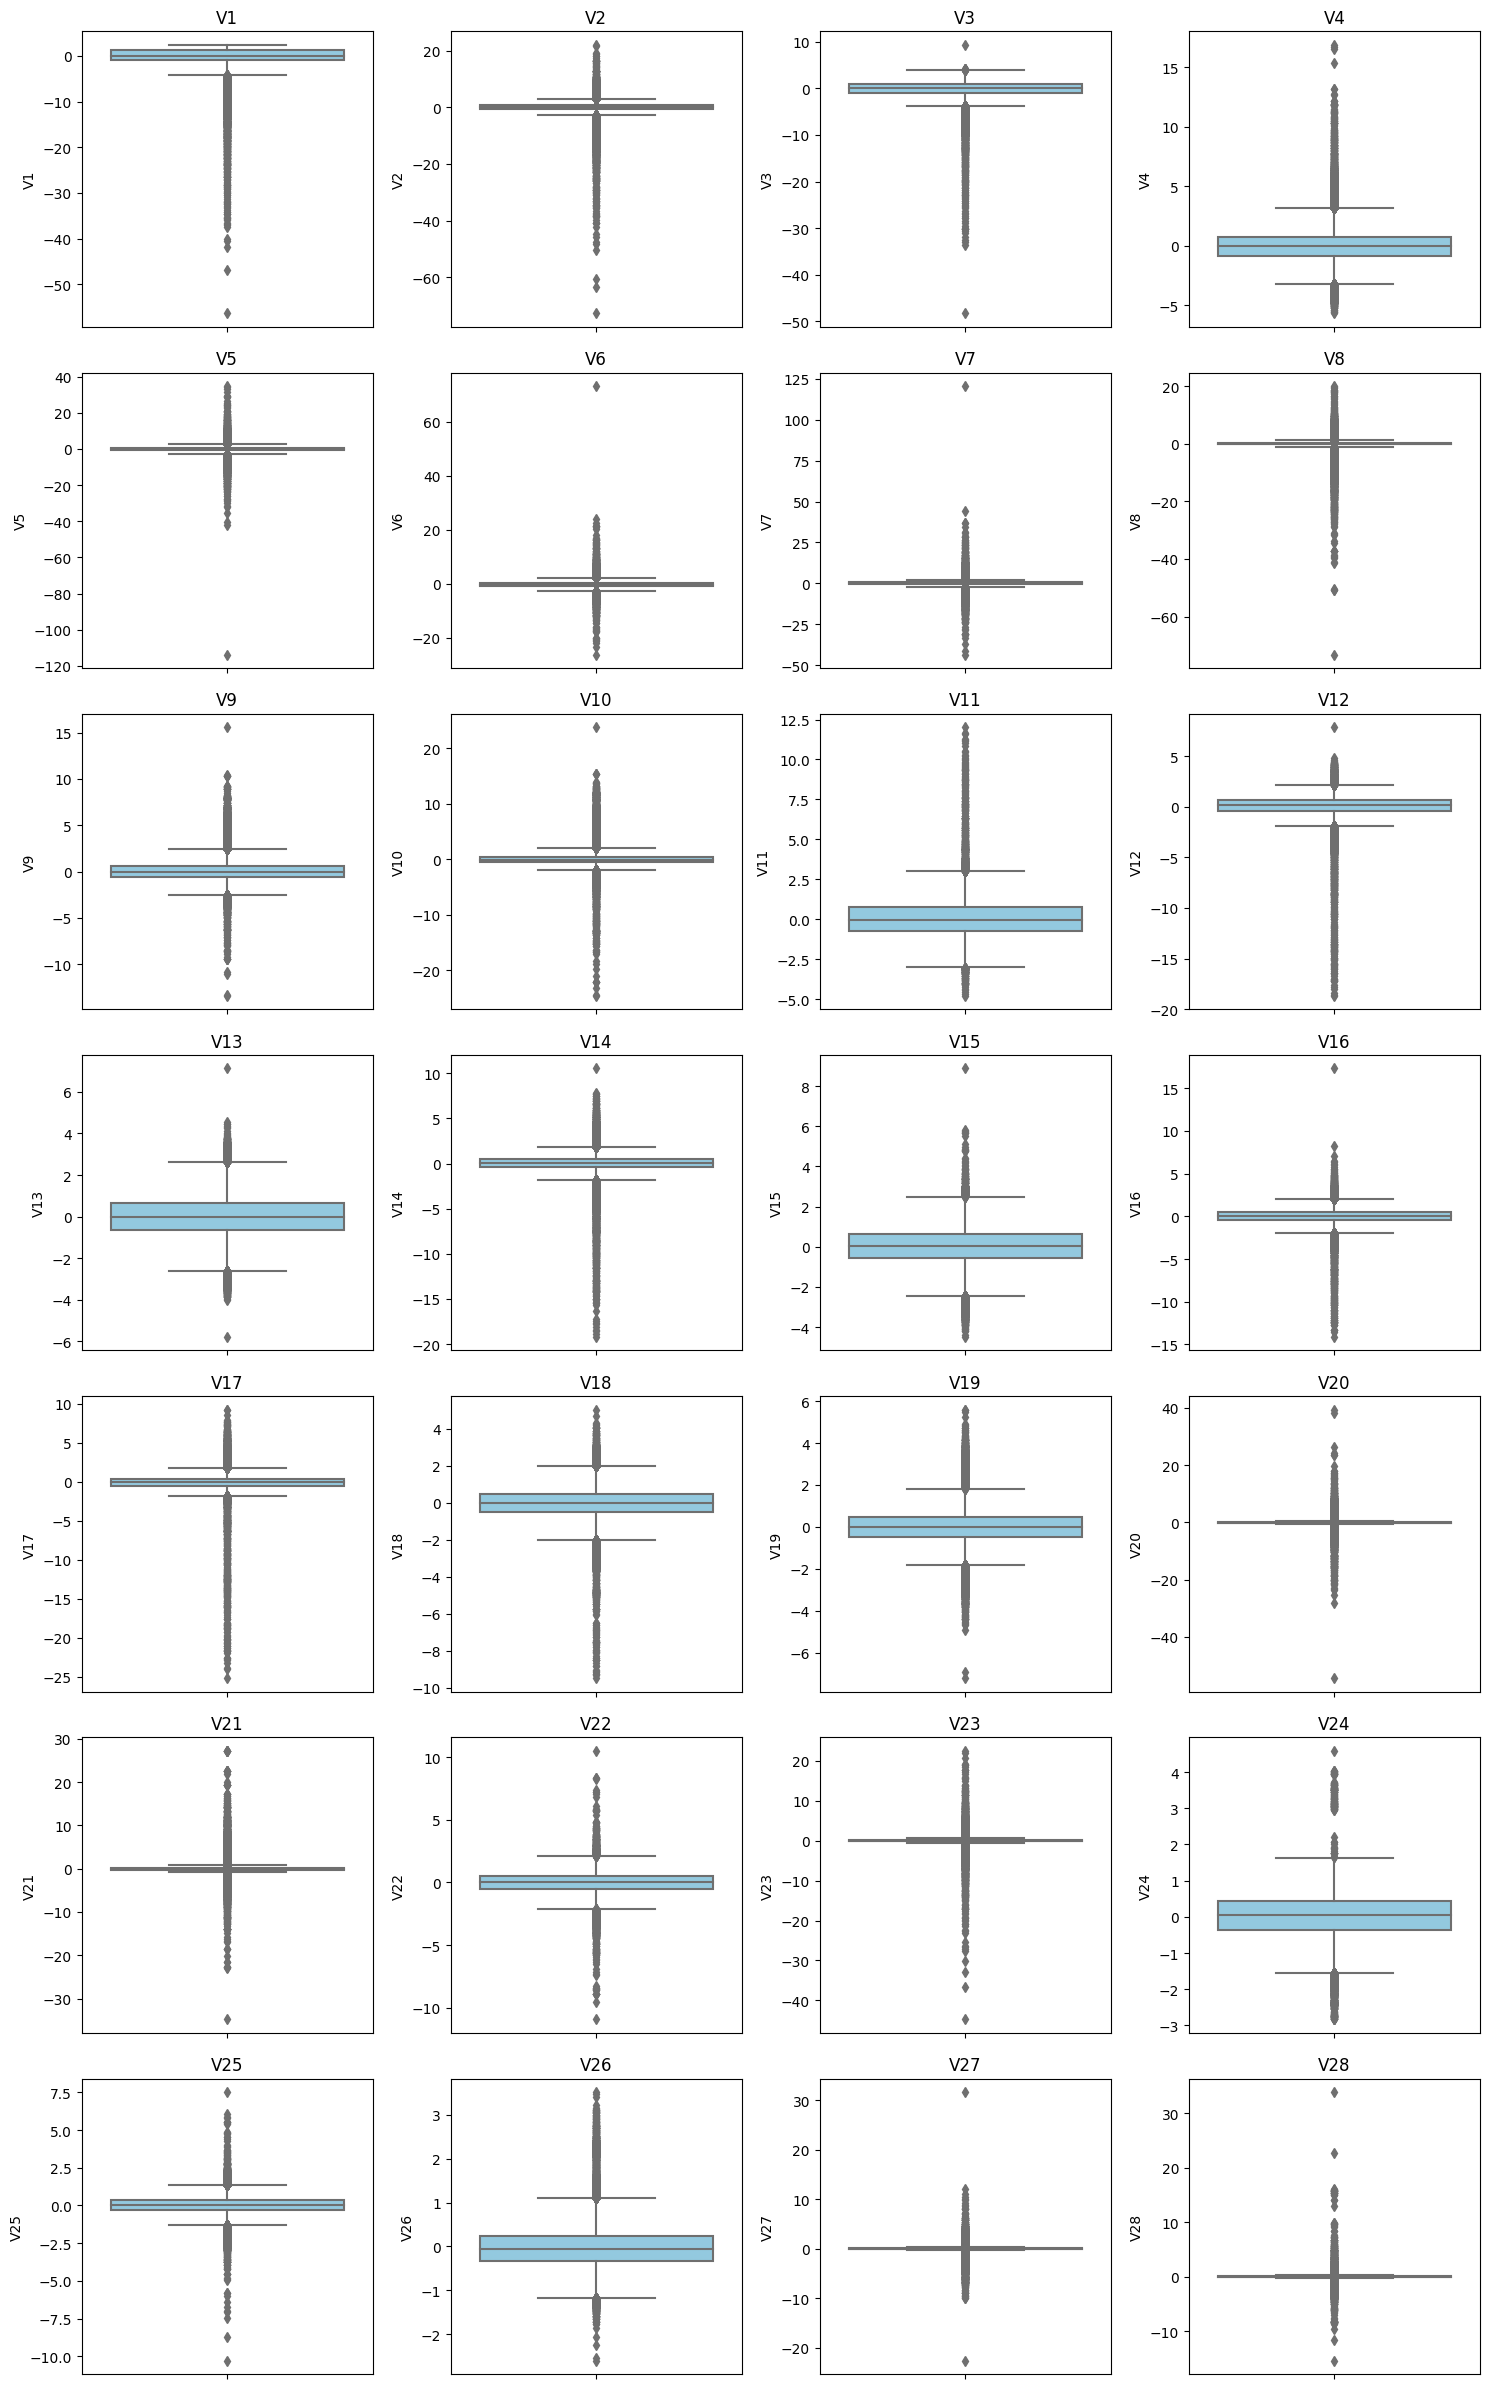

In [ ]:
# Boxplot을 사용한 이상치 확인
plt.figure(figsize=(15, 24))
for i, col in enumerate(data.columns[1:29], 1):  # 'Time'과 'Class' 제외
    plt.subplot(7, 4, i)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.show()

# 2. Preprocessing

## 1) 이상치 제거

- 반응변수(Class)에 가장 많은 영향을 미치는 독립변수 확인
- 확인 결과, V12, V14, V17 변수가 반응변수(y)에 가장 많은 영향을 미침

In [ ]:
# SelectKBest 통해 반응변수(Class)와 상관관계가 높은 설명변수 3개 출력

# 설명변수 X 지정
X = data.drop('Class', axis = 1)
# 반응변수 y 지정
y = data['Class']

X['Amount'] = np.log(X['Amount'] + 1)
X['Time'] = (X['Time'] % 86400) // 3600

# SelectKBest
selector = SelectKBest(score_func = f_regression, k = 3)
X_selected = selector.fit_transform(X, y)
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]
print("선택된 피처들:", selected_features)

선택된 피처들: Index(['V12', 'V14', 'V17'], dtype='object')


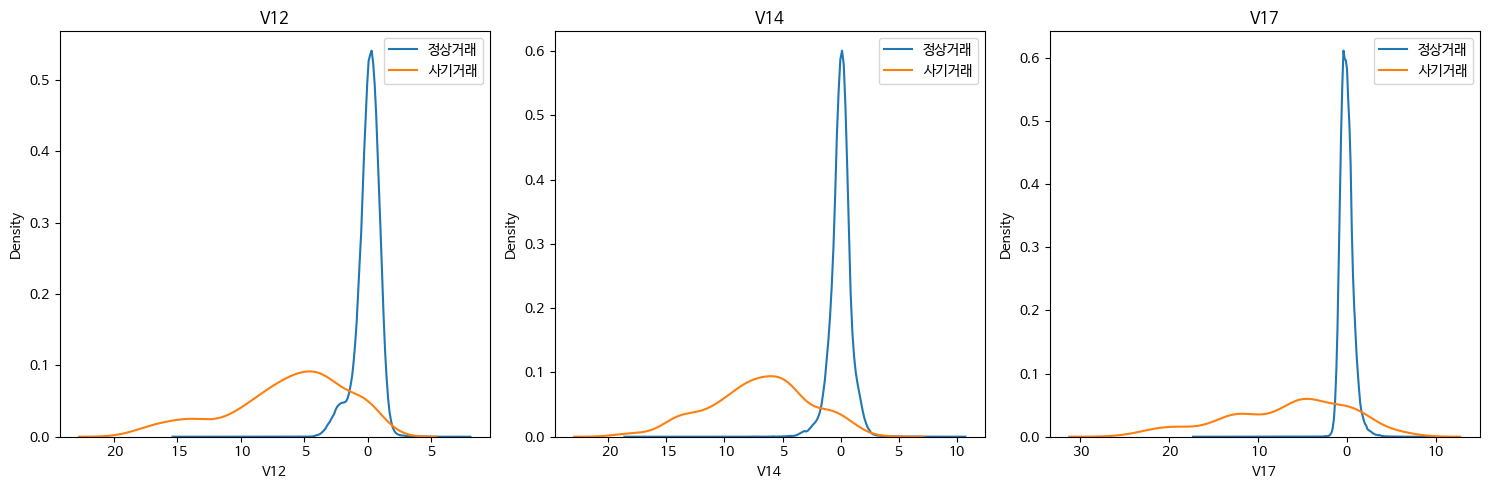

In [ ]:
# 위에서 얻은 결과를 바탕으로 반응변수에 가장 많은 영향을 미치는 설명변수('V12', 'V14', 'V17')의 분포 시각화

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Class별 'V12'변수의 분포 시각화
sns.kdeplot(X.loc[y == 0,'V12'], ax=axes[0], label='정상거래')
sns.kdeplot(X.loc[y == 1,'V12'], ax=axes[0] ,label='사기거래' )
axes[0].legend()
axes[0].set_title('V12')

# Class별 'V14'변수의 분포 시각화
sns.kdeplot(X.loc[y == 0,'V14'], ax=axes[1], label='정상거래')
sns.kdeplot(X.loc[y == 1,'V14'], ax=axes[1] ,label='사기거래' )
axes[1].legend()
axes[1].set_title('V14')

# Class별 'V17'변수의 분포 시각화
sns.kdeplot(X.loc[y == 0,'V17'], ax=axes[2], label='정상거래')
sns.kdeplot(X.loc[y == 1,'V17'], ax=axes[2] ,label='사기거래' )
axes[2].legend()
axes[2].set_title('V17')

plt.tight_layout()

- 반응변수에 가장 많은 영향을 미치는 V12, V14, V17 변수에 대해서만 이상치를 제거하기로 결정

In [ ]:
# 이상치 제거할 변수 3개
col_names = 'V12','V14','V17'

# threshold_std가 커질수록 더 많은 이상치가 제거됨
# 본 코드 제출본에서는 이상치 제거가 이루어지지 않은 모델 성능을 보이고자 500으로 설정
threshold_std = 500

# 이상치들의 index를 저장할 list 생성
outliers = []

for col in col_names:
  group0_data = data[data['Class'] == 0][col]
  group1_data = data[data['Class'] == 1][col]

  # V12, V14, V17 각 변수에 대해 'Class == 0'인 데이터의 평균과 표준편차 구하기
  mean_group0 = np.mean(group0_data)
  std_group0 = np.std(group0_data)

  # V12, V14, V17 각 변수에 대해 'Class == 1'인 데이터의 평균과 표준편차 구하기
  mean_group1 = np.mean(group1_data)
  std_group1 = np.std(group1_data)

  # V12, V14, V17 각 변수에 대해 'Class == 0'인 데이터의 이상치 기준 정의
  lowest_val0 = mean_group0 - threshold_std * std_group0
  highest_val0 = mean_group0 + threshold_std * std_group0

  # V12, V14, V17 각 변수에 대해 'Class == 1'인 데이터의 이상치 기준 정의
  lowest_val1 = mean_group1 - threshold_std * std_group1
  highest_val1 = mean_group1 + threshold_std * std_group1

  # V12, V14, V17 각 변수에 대해 이상치들의 index 구하기
  outlier_index0 = group0_data[(group0_data < lowest_val0) | (group0_data > highest_val0)].index
  outlier_index1 = group1_data[(group1_data < lowest_val1) | (group1_data > highest_val1)].index

  # 아직 'outliers' list에 저장되지 않은 이상치들만 outliers에 append
  for i in range(len(outlier_index0)):
    if outlier_index0[i] not in outliers:
      outliers.append(outlier_index0[i])

  for j in range(len(outlier_index1)):
    if outlier_index1[j] not in outliers:
      outliers.append(outlier_index1[j])

# 'outliers' list에 있는 행들은 data에서 제거
data.drop(outliers, axis=0, inplace=True)

## 2) 로그 변환

- 분포가 right-skewed된 'Amount' 변수는 로그 변환

In [ ]:
# 'Amount' 변수 로그 변환
amount_log = np.log(data['Amount'] + 1)

# 로그 변환된 값을 'Amount_log' 변수명으로 데이터에 삽입
data.insert(0, 'Amount_log', amount_log)

# 기존 'Amount'열 삭제
data.drop('Amount', axis=1, inplace=True)

## 3) train/validation/test set split, scale, SMOTE

- train : validation : test = 6 : 2 : 2로 split

In [ ]:
# 설명변수 X 지정
X = data.drop("Class", axis = 1)
# 반응변수 y 지정
y = data["Class"]

# X와 y를 train/validation/test set으로 split
# train:validation:test = 6:2:2로 split
X_train, X_transfer, y_train, y_transfer = train_test_split(X, y, test_size=0.4, random_state=42, stratify = y)
X_validation, X_test, y_validation, y_test = train_test_split(X_transfer, y_transfer, test_size=0.5, random_state=42, stratify = y_transfer)

- Amount_log, Time 변수에 대해서만 standard scaler 적용

In [ ]:
# scaler = Standard Scaler로 설정
scaler = StandardScaler()

# 'Amount_log'변수에 scaler 적용
# train set에는 fit_transform, validation set과 test set에는 transform 함수 적용
X_train['Amount_log'] = scaler.fit_transform(X_train['Amount_log'].values.reshape(-1, 1))
X_validation['Amount_log'] = scaler.transform(X_validation['Amount_log'].values.reshape(-1, 1))
X_test['Amount_log'] = scaler.transform(X_test['Amount_log'].values.reshape(-1, 1))

# 'Time' 변수에 scaler 적용
# train set에는 fit_transform, validation set과 test set에는 transform 함수 적용
X_train['Time'] = scaler.fit_transform(X_train['Time'].values.reshape(-1, 1))
X_validation['Time'] = scaler.transform(X_validation['Time'].values.reshape(-1, 1))
X_test['Time'] = scaler.transform(X_test['Time'].values.reshape(-1, 1))

- Class의 분포가 매우 불균형하기에 SMOTE 시도

In [ ]:
# SMOTE 실행
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 3. Modeling

## 1) Logistic regression

NO SMOTE
       Model  accuracy  precision    recall        f1   roc_auc
0  Logistics   0.99928   0.871795  0.686869  0.768362  0.843346
------------------------------------------------------------------------
SMOTE
             Model  accuracy  precision    recall        f1   roc_auc
0  Logistics_smote  0.975563     0.0611  0.909091  0.114504  0.942385



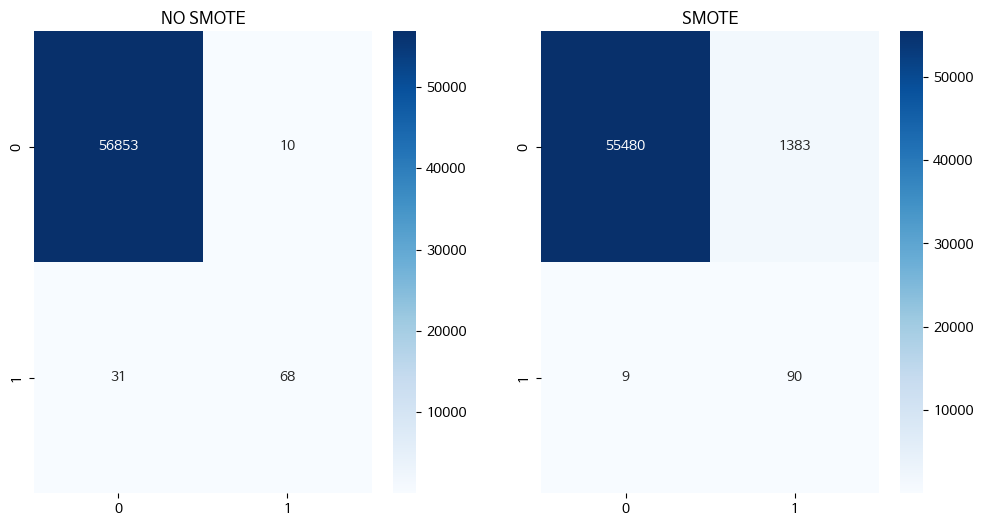

In [ ]:
# SMOTE 실행하지 않은 데이터로 LogisticRegression 실행
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# SMOTE 실행한 데이터로 LogisticRegression 실행
model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test)

# SMOTE 실행하지 않은 모델 성능
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

Result={
   'Model'  : ['Logistics'],
   'accuracy': [accuracy],
   'precision':[precision],
   'recall' :[recall],
   'f1' :[f1],
   'roc_auc' :[roc_auc],
}
Result = pd.DataFrame(Result)

# SMOTE 실행한 모델 성능
accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', ax=axes[0])
axes[0].set_title('NO SMOTE')
sns.heatmap(conf_matrix_smote, annot=True, fmt="d", cmap='Blues', ax=axes[1])
axes[1].set_title('SMOTE')

Result_smote = {
   'Model'  : ['Logistics_smote'],
   'accuracy': [accuracy_smote],
   'precision':[precision_smote],
   'recall' :[recall_smote],
   'f1' :[f1_smote],
   'roc_auc' :[roc_auc_smote],
}
Result_smote = pd.DataFrame(Result_smote)

print('NO SMOTE')
print(Result)
print('------------------------------------------------------------------------')
print('SMOTE')
print(Result_smote)
print('')

## 2-1) Linear regression - Lasso penalty

### [Hyperparameter tuning]
- alpha값 (penalty항 계수)
- 확률을 binary값으로 나누는 threshold


In [ ]:
# alpha값 후보 지정
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
# 최적의 threshold값 후보 지정
thresholds = np.arange(0.01, 1, 0.01)

results = []
for alpha in alphas:
  lasso = Lasso(alpha)
  lasso.fit(X_train, y_train)
  # validation set 이용해 hyperparameter tuning 진행
  probability = lasso.predict(X_validation)

  # 각 alpha값에 대한 최적의 threshold 찾는 코드
  f1_scores = []
  for threshold in thresholds:
    predicted_binary = np.where(probability > threshold, 1, 0)
    f1 = f1_score(y_validation, predicted_binary)
    f1_scores.append(f1)

  # f1 score가 최대가 되는 best threshold 저장
  max_f1 = max(f1_scores)
  best_threshold = thresholds[f1_scores.index(max_f1)]
  results.append([alpha, best_threshold, max_f1])

columns = ['Alpha', 'Best Threshold', 'F1 Score']
eval_df = pd.DataFrame(results, columns=columns)
# f1 score가 큰 순으로 데이터프레임 정렬
eval_df.sort_values(by = 'F1 Score', ascending = False, inplace = True)
eval_df

,Alpha,Best Threshold,F1 Score
2,0.00100,0.20,0.781250
0,0.00001,0.22,0.777202
1,0.00010,0.22,0.777202
3,0.01000,0.03,0.736264
4,0.10000,0.01,0.000000
5,1.00000,0.01,0.000000


In [ ]:
# f1 score가 최대가 되는 alpha와 threshold 저장
alpha = eval_df.iloc[0, 0]
threshold = eval_df.iloc[0, 1]
print('alpha:', alpha, ',', 'threshold:', threshold)

alpha: 0.001 , threshold: 0.2


### [Lasso Modeling]
- 위에서 얻은 최적의 alpha(0.001)와 threshold(0.2)를 활용하여 모델링

In [ ]:
# Lasso 모델학습 (train set 이용)
lasso = Lasso(alpha)
lasso.fit(X_train, y_train)

# Lasso 모델평가 (test set 이용)
probability = lasso.predict(X_test)

# Lasso는 확률값 반환
# 따라서 위에서 구한 threshold를 이용해 확률값을 binary값(0, 1)로 변환
predicted_binary = np.where(probability > threshold, 1, 0)

# 모델 평가지표
accuracy = accuracy_score(y_test, predicted_binary)
precision = precision_score(y_test, predicted_binary)
recall = recall_score(y_test, predicted_binary)
f1 = f1_score(y_test, predicted_binary)
roc_auc = roc_auc_score(y_test, predicted_binary)
conf_matrix = confusion_matrix(y_test, predicted_binary)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', ax=axes[0])

Result = {
   'Model'  : ['Linear regression_Panelty(L1)'],
   'accuracy': [accuracy],
   'precision':[precision],
   'recall' :[recall],
   'f1' :[f1],
   'roc_auc' :[roc_auc],
}
Result = pd.DataFrame(Result)

Result

,Model,accuracy,precision,recall,f1,roc_auc
0,Linear regression_Panelty(L1),0.999456,0.869565,0.808081,0.837696,0.903935


## 2-2) Linear regression - Ridge penalty

### [Hyperparameter tuning]
- alpha값 (penalty항 계수)
- 확률을 binary값으로 나누는 threshold


In [ ]:
# alpha값 후보 지정
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
# 최적의 threshold값 후보 지정
thresholds = np.arange(0.01, 1, 0.01)

results = []
for alpha in alphas:
  ridge = Ridge(alpha)
  ridge.fit(X_train, y_train)
  # validation set 이용해 hyperparameter tuning 진행
  probability = ridge.predict(X_validation)

  # 각 alpha값에 대한 최적의 threshold 찾는 코드
  f1_scores = []
  for threshold in thresholds:
    predicted_binary = np.where(probability > threshold, 1, 0)
    f1 = f1_score(y_validation, predicted_binary)
    f1_scores.append(f1)

  # f1 score가 최대가 되는 best threshold 저장
  max_f1 = max(f1_scores)
  best_threshold = thresholds[f1_scores.index(max_f1)]
  results.append([alpha, best_threshold, max_f1])

columns = ['Alpha', 'Best Threshold', 'F1 Score']
eval_df = pd.DataFrame(results, columns=columns)
# f1 score가 큰 순으로 데이터프레임 정렬
eval_df.sort_values(by = 'F1 Score', ascending = False, inplace = True)
eval_df

,Alpha,Best Threshold,F1 Score
0,0.00001,0.22,0.777202
1,0.00010,0.22,0.777202
2,0.00100,0.22,0.777202
3,0.01000,0.22,0.777202
4,0.10000,0.22,0.777202
5,1.00000,0.22,0.777202


In [ ]:
# f1 score가 최대가 되는 alpha와 threshold 저장
alpha = eval_df.iloc[0, 0]
threshold = eval_df.iloc[0, 1]
print('alpha:', alpha, ',', 'threshold:', threshold)

alpha: 1e-05 , threshold: 0.22


### [Ridge Modeling]
- 위에서 얻은 최적의 alpha(0.00001)와 threshold(0.22)를 활용하여 모델링

In [ ]:
# Ridge 모델학습 (train set 이용)
ridge = Ridge(alpha)
ridge.fit(X_train, y_train)

# Ridge 모델평가 (test set 이용)
probability = ridge.predict(X_test)

# Ridge는 확률값 반환
# 따라서 위에서 구한 threshold를 이용해 확률값을 binary값(0, 1)로 변환
predicted_binary = np.where(probability > threshold, 1, 0)

# 모델 평가지표
accuracy = accuracy_score(y_test, predicted_binary)
precision = precision_score(y_test, predicted_binary)
recall = recall_score(y_test, predicted_binary)
f1 = f1_score(y_test, predicted_binary)
roc_auc = roc_auc_score(y_test, predicted_binary)
conf_matrix = confusion_matrix(y_test, predicted_binary)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', ax=axes[0])

Result = {
   'Model'  : ['Linear regression_Panelty(L2)'],
   'accuracy': [accuracy],
   'precision':[precision],
   'recall' :[recall],
   'f1' :[f1],
   'roc_auc' :[roc_auc],
}
Result = pd.DataFrame(Result)

Result

,Model,accuracy,precision,recall,f1,roc_auc
0,Linear regression_Panelty(L2),0.999456,0.869565,0.808081,0.837696,0.903935


## 3) Decision Tree

### [Hyperparameter tuning]
- max_depth

In [ ]:
# max_depth값 후보 지정
depths = np.arange(1,20,1)

f1_scores = []
for depth in depths:
    dt_clf = DecisionTreeClassifier(max_depth = depth)
    dt_clf.fit(X_train, y_train)
    # validation set 이용해 hyperparameter tuning 진행
    predictions = dt_clf.predict(X_validation)
    f1 = f1_score(y_validation,predictions)
    f1_scores.append(f1)

eval_df = pd.DataFrame({'# of depth' : depths, 'F1 Score' : f1_scores})
eval_df.sort_values(by = 'F1 Score', ascending = False, inplace = True)
eval_df

,# of depth,F1 Score
6,7,0.791444
7,8,0.791444
5,6,0.789189
3,4,0.787565
4,5,0.780749
9,10,0.778378
10,11,0.772487
13,14,0.769231
15,16,0.761421
8,9,0.759358


In [ ]:
# f1 score가 최대가 되는 depth 저장
depth = eval_df.iloc[0, 0]
print('max_depth:', depth)

max_depth: 7


### [Decision Tree Modeling]
- 위에서 얻은 최적의 max_depth(7)를 활용하여 모델링

In [ ]:
# Decision Tree 모델학습 (train set 이용)
clf = DecisionTreeClassifier(max_depth = depth)
clf.fit(X_train, y_train)

# Decision Tree 모델평가
predictions = clf.predict(X_test)

# 모델 평가지표
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', ax=axes[0])

Result = {
   'Model'  : ['Decision Tree'],
   'accuracy': [accuracy],
   'precision':[precision],
   'recall' :[recall],
   'f1' :[f1],
   'roc_auc' :[roc_auc],
}
Result = pd.DataFrame(Result)

Result

,Model,accuracy,precision,recall,f1,roc_auc
0,Decision Tree,0.999438,0.885057,0.777778,0.827957,0.888801


## 4) Random Forest

### [Hyperparameter tuning]
- max_depth
- n_estimators


In [ ]:
# max_depth값 후보 지정
depths = np.arange(1,10,1)
# n_estimators값 후보 지정
estimators = np.arange(1,10,1)

results = []
for depth in depths:
  for estimator in estimators:
    rf = RandomForestClassifier(n_estimators = estimator, max_depth = depth, random_state=42)
    rf.fit(X_train, y_train)
    # validation set 이용해 hyperparameter tuning 진행
    predictions = rf.predict(X_validation)

    f1 = f1_score(y_validation, predictions)
    results.append([depth, estimator, f1])

columns = ['max_depth', 'n_estimator', 'F1 Score']
eval_df = pd.DataFrame(results, columns = columns)
eval_df.sort_values(by = 'F1 Score', ascending = False, inplace = True)
eval_df

,max_depth,n_estimator,F1 Score
77,9,6,0.820809
78,9,7,0.816092
71,8,9,0.804598
80,9,9,0.802326
51,6,7,0.802326
...,...,...,...
7,1,8,0.598726
6,1,7,0.598726
5,1,6,0.598726
3,1,4,0.598726


In [ ]:
# f1 score가 최대가 되는 max_depth와 n_estimators 저장
depth = eval_df.iloc[0, 0]
estimator = eval_df.iloc[0, 1]
print('max_depth:', depth, ',', 'n_estimators:', estimator)

max_depth: 9 , n_estimators: 6


### [Random Forest Modeling]
- 위에서 얻은 최적의 max_depth(9)와 n_estimators(6)를 활용하여 모델링

In [ ]:
# Random Forest 모델학습 (train set 이용)
rf = RandomForestClassifier(n_estimators = estimator, max_depth = depth, random_state=42)
rf.fit(X_train, y_train)

# Random Forest 모델평가 (test set 이용)
predictions = rf.predict(X_test)

# 모델 평가지표
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', ax=axes[0])

Result = {
   'Model'  : ['Random Forest'],
   'accuracy': [accuracy],
   'precision':[precision],
   'recall' :[recall],
   'f1' :[f1],
   'roc_auc' :[roc_auc],
}
Result = pd.DataFrame(Result)

Result

,Model,accuracy,precision,recall,f1,roc_auc
0,Random Forest,0.999526,0.973684,0.747475,0.845714,0.87372


## 5) XGBoost


### [Hyperparameter tuning]
- max_depth
- n_estimators

In [ ]:
# max_depth값 후보 지정
depths = np.arange(1,10,1)
# n_estimators값 후보 지정
estimators = np.arange(0,50,10)

results = []
for depth in depths:
  for estimator in estimators:
    model = xgb.XGBClassifier(
    max_depth = depth,
    learning_rate = 0.1,
    n_estimators = estimator,
    objective = 'binary:logistic'
    )
    model.fit(X_train, y_train)

    predictions = model.predict(X_validation)

    f1 = f1_score(y_validation, predictions)
    results.append([depth, estimator, f1])

columns = ['max_depth', 'n_estimator', 'F1 Score']
eval_df = pd.DataFrame(results, columns = columns)
eval_df.sort_values(by = 'F1 Score', ascending = False, inplace = True)
eval_df

,max_depth,n_estimator,F1 Score
23,5,30,0.828729
43,9,30,0.828729
38,8,30,0.828729
22,5,20,0.824176
33,7,30,0.822222
27,6,20,0.822222
39,8,40,0.820225
34,7,40,0.820225
29,6,40,0.820225
24,5,40,0.820225


In [ ]:
# f1 score가 최대가 되는 max_depth와 n_estimators 저장
depth = eval_df.iloc[0, 0]
estimator = eval_df.iloc[0, 1]
print('max_depth:', depth, ',', 'n_estimators:', estimator)

max_depth: 5 , n_estimators: 30


### [XGBoost Modeling]
- 위에서 얻은 최적의 max_depth(8)와 n_estimators(30)를 활용하여 모델링



In [ ]:
# XGBoost 모델학습 (train set 이용)
model = xgb.XGBClassifier(
    max_depth = 8,
    learning_rate=0.1,
    n_estimators = 30,
    objective='binary:logistic'
)
model.fit(X_train, y_train)

# XGBoost 모델평가 (test set 이용)
predictions = model.predict(X_test)

# 모델 평가지표
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
Result = {
   'Model'  : ['XGBoost'],
   'accuracy': [accuracy],
   'precision':[precision],
   'recall' :[recall],
   'f1' :[f1],
   'roc_auc' :[roc_auc],
}
Result = pd.DataFrame(Result)

Result

,Model,accuracy,precision,recall,f1,roc_auc
0,XGBoost,0.999649,0.94382,0.848485,0.893617,0.924198


## 6) ADABoost

### [Hyperparameter tuning]
- max_depth

In [ ]:
# max_depth값 후보 지정
depths = np.arange(1,10,1)

f1_scores=[]
for depth in depths:
  base_estimator = DecisionTreeClassifier(max_depth = depth)
  adaboost_model = AdaBoostClassifier(
  base_estimator = base_estimator,
  n_estimators = 10,
  algorithm='SAMME'
  )
  adaboost_model.fit(X_train, y_train)
  # validation set 이용해 hyperparameter tuning 진행
  predictions = adaboost_model.predict(X_validation)

  f1 = f1_score(y_validation,predictions)
  f1_scores.append(f1)

eval_df = pd.DataFrame({'depth' : depths,'F1 Score' : f1_scores})
eval_df.sort_values(by = 'F1 Score', ascending = False, inplace = True)
eval_df

,depth,F1 Score
6,7,0.829545
5,6,0.827957
7,8,0.822857
8,9,0.811429
3,4,0.795580
4,5,0.795580
2,3,0.721649
1,2,0.701571
0,1,0.645833


In [ ]:
# f1 score가 최대가 되는 depth 저장
depth = eval_df.iloc[0, 0]
print('max_depth:', depth)

max_depth: 7


### [ADABoost Modeling]
- 위에서 얻은 최적의 max_depth(9)를 활용하여 모델링

In [ ]:
# ADABoost 모델학습 (train set 이용)
base_estimator = DecisionTreeClassifier(max_depth = depth)
adaboost_model = AdaBoostClassifier(
    base_estimator=base_estimator,
    n_estimators=10,
    algorithm='SAMME'
)
adaboost_model.fit(X_train, y_train)

# ADABoost 모델평가 (test set 이용)
predictions = adaboost_model.predict(X_test)

# 모델 평가지표
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

Result = {
   'Model'  : ['AdaBoost'],
   'accuracy': [accuracy],
   'precision':[precision],
   'recall' :[recall],
   'f1' :[f1],
   'roc_auc' :[roc_auc],
}
Result = pd.DataFrame(Result)

Result

,Model,accuracy,precision,recall,f1,roc_auc
0,AdaBoost,0.999561,0.974359,0.767677,0.858757,0.883821


## 7) LightGBM

### [Hyperparameter tuning]
- max_depth
- n_estimators

In [ ]:
# max_depth값 후보 지정
depths = np.arange(1,10,1)
# n_estimators값 후보 지정
estimators = np.arange(100,600,100)

results = []
for depth in depths:
  for estimator in estimators:
    # LGBM 모델 정의
    model = lgb.LGBMClassifier(
    boosting_type = 'gbdt',
    n_estimators = estimator,
    learning_rate = 0.1,
    boost_from_average = False,
    num_leaves = 64,
    max_depth = depth,
    )
    model.fit(X_train, y_train)
    predictions = model.predict(X_validation)
    f1 = f1_score(y_validation, predictions)
    results.append([depth, estimator, f1])

columns = ['max_depth', 'n_estimator', 'F1 Score']
eval_df = pd.DataFrame(results, columns = columns)
eval_df.sort_values(by = 'F1 Score', ascending = False, inplace = True)
eval_df

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

,max_depth,n_estimator,F1 Score
33,7,400,0.842697
32,7,300,0.842697
42,9,300,0.842697
39,8,500,0.842697
38,8,400,0.842697
37,8,300,0.842697
36,8,200,0.842697
28,6,400,0.842697
34,7,500,0.842697
31,7,200,0.842697


In [ ]:
# f1 score가 최대가 되는 max_depth와 n_estimators 저장
depth = eval_df.iloc[0, 0]
estimator = eval_df.iloc[0, 1]
print('max_depth:', depth, ',', 'n_estimators:', estimator)

max_depth: 7 , n_estimators: 400


### [LightGBM Modeling]
- 위에서 얻은 최적의 max_depth(7)와 n_estimators(400)를 활용하여 모델링

In [ ]:
# LightGBM 모델
model = lgb.LGBMClassifier(
    boosting_type = 'gbdt',
    n_estimators = estimator,
    learning_rate = 0.1,
    max_depth = depth,
    num_leaves = depth**2,
    boost_from_average=False
)
# LightGBM 모델학습 (train set 이용)
model.fit(X_train, y_train)

# LightGBM 모델평가 (test set 이용)
predictions = model.predict(X_test)

# 모델 평가지표
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

Result = {
   'Model'  : ['Light GBM'],
   'accuracy': [accuracy],
   'precision':[precision],
   'recall' :[recall],
   'f1' :[f1],
   'roc_auc' :[roc_auc],
}
Result = pd.DataFrame(Result)

Result

[LightGBM] [Info] Number of positive: 295, number of negative: 170589
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.217994 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 170884, number of used features: 30
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

,Model,accuracy,precision,recall,f1,roc_auc
0,Light GBM,0.999596,0.963415,0.79798,0.872928,0.898964


## 8) SVM

### [Hyperparameter tuning]
- kernal (linear / rbf / poly)

In [ ]:
# kernel값 후보 지정
kernels = ['linear', 'rbf', 'poly']
f1_scores = []

for kernel in kernels:
  print('current kernel:', kernel)
  svm_model = SVC(kernel = kernel, C=1.0)
  svm_model.fit(X_train, y_train)
  # validation set 이용해 hyperparameter tuning 진행
  predictions = svm_model.predict(X_validation)

  f1 = f1_score(y_validation, predictions)
  f1_scores.append(f1)

eval_df = pd.DataFrame({'kernel' : kernels, 'F1 Score' : f1_scores})
eval_df.sort_values(by = 'F1 Score', ascending = False, inplace = True)
eval_df

current kernel: linear
current kernel: rbf
current kernel: poly


,kernel,F1 Score
2,poly,0.813953
1,rbf,0.768293
0,linear,0.760417


In [ ]:
# f1 score가 최대가 되는 kernel 저장
kernel = eval_df.iloc[0, 0]
print('kernel:', kernel)

kernel: poly


### [SVM Modeling]
- 위에서 얻은 최적의 kernel(poly)을 활용하여 모델링

In [ ]:
# SVM 모델학습 (train set 이용)
svm_model = SVC(kernel = kernel, C=1.0)  # You can adjust the kernel and other hyperparameters
svm_model.fit(X_train, y_train)

# SVM 모델평가 (test set 이용)
predictions = svm_model.predict(X_test)

# 모델 평가지표
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

Result = {
   'Model'  : ['SVM'],
   'accuracy': [accuracy],
   'precision':[precision],
   'recall' :[recall],
   'f1' :[f1],
   'roc_auc' :[roc_auc],
}
Result = pd.DataFrame(Result)

Result

,Model,accuracy,precision,recall,f1,roc_auc
0,SVM,0.999438,0.91358,0.747475,0.822222,0.873676


## 9) 비지도학습
- KMeans clustering


Text(0, 0.5, 'Frequency')

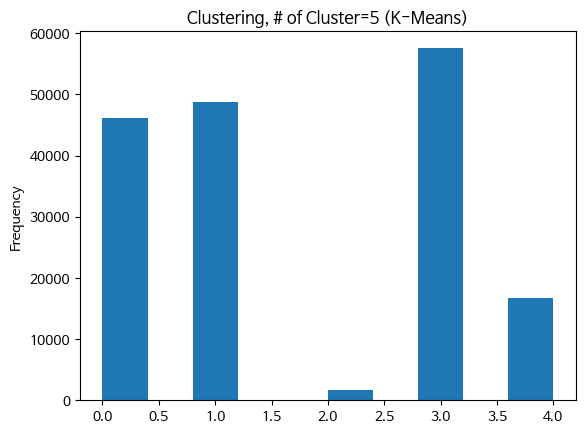

In [ ]:
# k-means clustering 진행
k = 5
kmeans = KMeans(n_clusters=5)

kmeans.fit(X_train)

labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

from collections import Counter
Counter(labels)

plt.hist(labels)
plt.title("Clustering, # of Cluster=5 (K-Means)")
plt.ylabel("Frequency")

- GMM

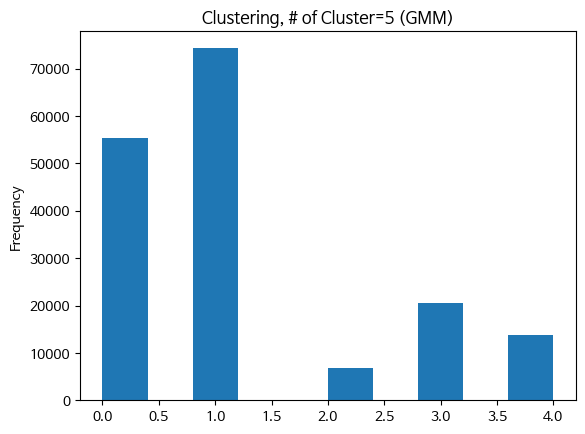

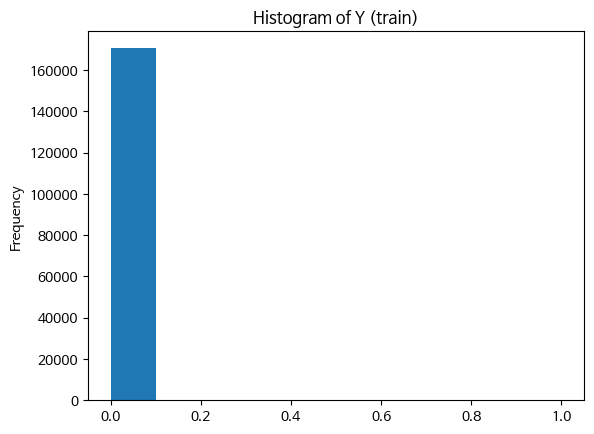

In [ ]:
# gmm 진행
gmm = GaussianMixture(n_components=5)
gmm.fit(X_train)
labels = gmm.predict(X_train)
Counter(labels)

plt.hist(labels)
plt.title("Clustering, # of Cluster=5 (GMM)")
plt.ylabel("Frequency")
plt.show()


plt.hist(y_train)
plt.title("Histogram of Y (train)")
plt.ylabel("Frequency")
plt.show()